# WNC Style Classifier -- Evaluation

In [2]:
from src.evaluation import StyleClassifierEvaluation

%load_ext lab_black
%load_ext autoreload
%autoreload 2

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
MODEL_PATH = "../models/bert-cls-full3/checkpoint-96000"
CLS_DATASET_PATH = "/home/cdsw/data/processed/WNC_cls_full"

sce = StyleClassifierEvaluation(
    model_identifier=MODEL_PATH, dataset_identifier=CLS_DATASET_PATH
)

  0%|          | 0/309 [00:00<?, ?ba/s]

  0%|          | 0/18 [00:00<?, ?ba/s]

  0%|          | 0/18 [00:00<?, ?ba/s]

In [16]:
sce.evaluate()

100%|██████████| 2152/2152 [00:31<00:00, 67.95it/s]


In [17]:
sce.metric_df

,text,true_label,pred_label,pred_score
0,"djibouti, as well as the puntland and somalila...",0,1,0.971600
1,"djibouti, as well as the puntland and somalila...",1,1,0.982679
2,he is now a varsity basketball head coach for ...,0,0,0.985774
3,he is now a varsity basketball head coach for ...,1,1,0.991174
4,"most notably, on september 11, 2011, the bushe...",0,0,0.822279
...,...,...,...,...
17209,"joseph ""sepp"" blatter (born 10 march 1936) is ...",1,1,0.858206
17210,"in the face of this uncomplimentary labeling ,...",0,0,0.845333
17211,"in the face of this label of ""heresy"" , samuel...",1,1,0.551120
17212,"for one, it illustrates nietzsche's evolution ...",0,0,0.735192


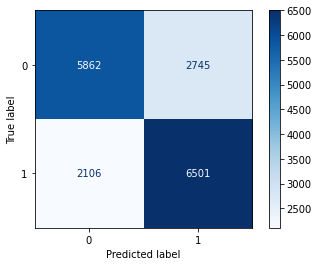

In [59]:
sce.plot_confusion_matrix()

In [72]:
sce.get_classification_report()

,precision,recall,f1-score,support
0,0.736,0.681,0.707,8607.000
1,0.703,0.755,0.728,8607.000
accuracy,0.718,0.718,0.718,0.718
macro avg,0.719,0.718,0.718,17214.000
weighted avg,0.719,0.718,0.718,17214.000


## Error Analysis

<AxesSubplot:title={'center':'Distribution of Prediced Scores'}, ylabel='Frequency'>

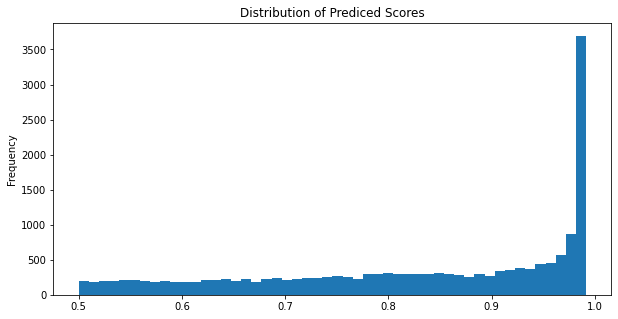

In [88]:
sce.metric_df.pred_score.plot(
    kind="hist", bins=50, title="Distribution of Prediced Scores", figsize=(10, 5)
)

### Severe False Positives (i.e. predicted `neutral` when actually `subjective`)

In [168]:
sce.highlight_classification_errors(kind="fp", n=25)

Record #2238 classified as NEUTRAL, when actually SUBJECTIVE: 
	 james barbour, is a singer and an actor.

Here's its NEUTRAL counterpart #2239: 
	 james barbour, is a singer and broadway actor.
---------------------------------------------------------------------

Record #5878 classified as NEUTRAL, when actually SUBJECTIVE: 
	 the club has won 13 league titles, 12 fa cups (a joint record), two league cups, 14 fa community shields, one uefa cup winners' cup and one inter-cities fairs cup , totalling 42 pieces of silverware in its history .

Here's its NEUTRAL counterpart #5879: 
	 the club has won 13 league titles, 12 fa cups (a joint record), two league cups, 14 fa community shields, one uefa cup winners' cup and one inter-cities fairs cup.
---------------------------------------------------------------------

Record #334 classified as NEUTRAL, when actually SUBJECTIVE: 
	 mac davis played small roles in the following tv shows and movies:

Here's its NEUTRAL counterpart #335: 
	 mac 

### Severe False Negatives (i.e. predicted `subjective` when actually `neutral`)

In [169]:
sce.highlight_classification_errors(kind="fn", n=25)

Record #5235 classified as SUBJECTIVE, when actually NEUTRAL: 
	 the patriotic nigras (also known by the initialism pn) are a group of griefers in the online world of second life.

Here's its SUBJECTIVE counterpart #5235: 
	 the patriotic nigras (also known by the initialism pn) are an awesome group of griefers in the online world of second life.
---------------------------------------------------------------------

Record #8099 classified as SUBJECTIVE, when actually NEUTRAL: 
	 julia scarlett elizabeth louis-dreyfus (born january 13, 1961) is an american actress and comedienne best known for her roles as elaine benes on the nbc sitcom seinfeld in the 1990s, and as christine campbell on the current cbs sitcom the new adventures of old christine.

Here's its SUBJECTIVE counterpart #8099: 
	 julia scarlett elizabeth louis-dreyfus (born january 13, 1961) is an american actor and comedienne best known for her roles as elaine benes on the nbc sitcom seinfeld in the 1990s, and as christine 